<a href="https://colab.research.google.com/github/rubyshkim/MathModeling/blob/main/GrowthModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The notes in this file are based on parts of Chapters 1 and 2 in Mathematical Modeling by Stefan Heinz, available through the University of Michigan libraries; and the article "A general model for ontogenetic growth" by West et al. (2001).

# Linear Models and Linearized Conceptual Models

## Linear Models
### A Simple but Useful Modeling Approach


Consider the following data on U.S. energy consumption from 1950-2005:

\begin{array}{ccccc}
t & C &  & t & C \\
1950 & 34.616 &  & 1980 & 78.122          \\
1955 & 40.208 &  & 1985 & 76.491          \\
1960 & 45.087 &  & 1990 & 84.652          \\
1965 & 54.017 &  & 1995 & 91.173          \\
1970 & 67.844 &  & 2000 & 98.975          \\
1975 & 71.999 &  & 2005 & 100.506    
\end{array}

We can choose a linear function $C(t)=91+1.25(t-1995)$ that passes through the first two points. Alternatively, choose $C(t)$ that minimizes some measure of error (more later).

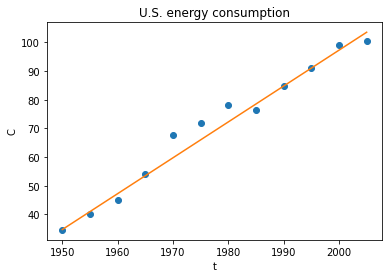

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np
 
t = np.linspace(1950,2005,12)
C = [34.616, 40.208, 45.087, 54.017, 67.844, 71.999, 78.122, 76.491, 84.652,
     91.173, 98.975, 100.506]
plt.plot(t,C,'o')
plt.plot(t,91+1.25*(t-1995))

plt.xlabel("t")
plt.ylabel("C")
plt.title("U.S. energy consumption")
plt.show()

##Exponential Growth


A population size $P(t)$ is said to grow exponentially if the population changes at a rate proportional to its size, i.e. for a constant $r$, $\;P' = rP.$

A general form of the equation for exponential growth/decay is given by $P(t) = P_0 e^{rt}$ where $P(0) = P_0$.

Consider the shifted exponential model, $$P(t) = P_0 e^{r(t-t_0)} \;\;\text{where}\;\; t_0>0 \;\;\text{is a constant}.$$

Taking the natural log of this equation gives us a linear relationship $\ln P = \ln P_0 + r(t-t_0)$ between $\ln P$ and $t$. For data that follow an exponential trend, semi-log ($\ln P$ vs. $t$) transformations can be very helpful for analysis.

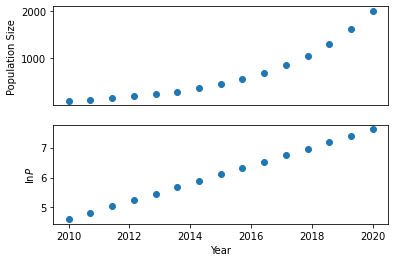

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 1)

x = np.linspace(2010,2020,15)
axs[0].plot(x,100*np.exp(0.3*(x-2010)),'o')
axs[0].set_ylabel('Population Size')
axs[0].set_xticks([]);

axs[1].plot(x,np.log(100*np.exp(0.3*(x-2010))),'o')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('$\lnP$')

plt.show()



##Logistic Growth

A population size $P(t)$ is said to grow logistically if the growth rate decreases linearly with $P$, i.e. for a constant $r>0$ and carrying capacity $K>0$, $\;P' = rP\left(1-\frac{P}{K}\right).$

A general form of the equation for logistic growth is given by

\begin{equation}
P(t) = \frac{K}{1+Ae^{-rt}}, \hspace{1cm} \text{where} \;\; A=\frac{K-P_0}{P_0}.
\end{equation}

Consider the shifted logistic model, $$P(t) = \frac{K}{1+Ae^{-r(t-t_0)}} \;\;\text{where}\;\; t_0>0 \;\;\text{is a constant}.$$

Taking the natural log of this equation (with some work) gives us a linear relationship $\ln \left( \frac{K}{P}-1 \right)  =\ln A -r(t-t_0)$ between $y=\ln \left( \frac{K}{P}-1 \right)$ and $t$. Below is an example of a dataset that follows a logistic trend and its corresponding linear transformation.

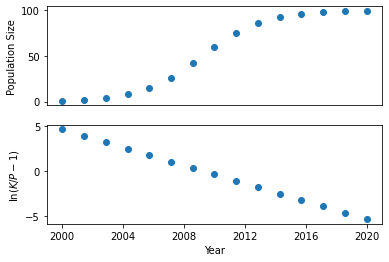

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 1)

x = np.linspace(2000,2020,15)
axs[0].plot(x,100/(1+(100-1)/1*np.exp(-0.5*(x-2000))),'o')
axs[0].set_ylabel('Population Size')
axs[0].set_xticks([]);

axs[1].plot(x,np.log(100/(100/(1+(100-1)/1*np.exp(-0.5*(x-2000))))-1),'o')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('$\ln(K/P-1)$')
axs[1].set_xticks(np.linspace(2000,2020,6))

plt.show()



##Polynomial Models

Polynomial models can sometimes be useful. It is always possible to construct a polynomial that passes exactly through all given data points. Polynomials can also be easily differentiated and integrated for analysis. However, simply fitting a polynomial function to data ***provides no explanation for the mechanism of the underlying process***. In addition, polynomial fits can be very sensitive to round-off errors or noise and erroneous data. Consider the linear data sets below. The upper two panels represent data with some noise while the lower two panels each contain one erroneous data point. The polynomials here are obtained using a [NumPy](https://en.wikipedia.org/wiki/NumPy) function called ```polyfit(x, y, deg)``` which fits a polynomial ```p(x) = p[0] * x**deg + ... + p[deg]``` of degree ```deg``` to points ```(x[i], y[i])``` using the least-squares criterion, which we will discuss soon.


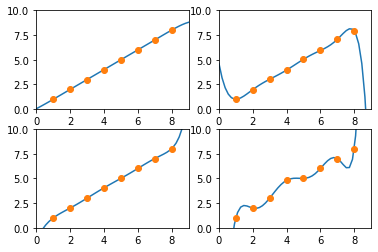

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

x = np.linspace(1,8,8)
xlong = np.linspace(0,9,50)
data1 = [1.0001,1.9998,3.0003,3.9996,5.0005,5.9994,7.0007,7.9992]
data2 = [1.01,1.98,3.03,3.96,5.05,5.94,7.07,7.92]
data3 = [1,2,3,4.04,5,6,7,8]
data4 = [1,2,3,4.8,5,6,7,8]

plt.subplot(2,2,1)
f1 = np.poly1d(np.polyfit(x,data1,9))
plt.plot(xlong,f1(xlong))
plt.plot(x,data1,'o')
plt.xlim([0,9])
plt.ylim([0,10])

plt.subplot(2,2,2)
f2 = np.poly1d(np.polyfit(x,data2,9))
plt.plot(xlong,f2(xlong))
plt.plot(x,data2,'o')
plt.xlim([0,9])
plt.ylim([0,10])

plt.subplot(2,2,3)
f3 = np.poly1d(np.polyfit(x,data3,9))
plt.plot(xlong,f3(xlong))
plt.plot(x,data3,'o')
plt.xlim([0,9])
plt.ylim([0,10])

plt.subplot(2,2,4)
f4 = np.poly1d(np.polyfit(x,data4,9))
plt.plot(xlong,f4(xlong))
plt.plot(x,data4,'o')
plt.xlim([0,9])
plt.ylim([0,10])

plt.show()

##CO2 Concentration Modeling



The atmospheric carbon dioxide (CO2) concentration is currently at around 412 parts per million (ppm), an almost 50% increase since the beginning of the Industrial Age. Below is a plot of CO2 concentrations from 1959 to 2005. The curve appears to be nearly linear. We can apply concepts from linear modeling to derive a simple model for CO2 concentration based on the trend of the data.

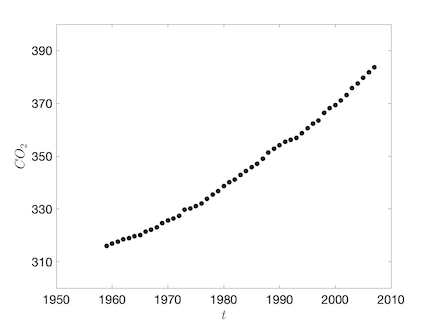

Consider the function $CO_2 = CO_2(t_0)+S(t)(t-t_0)$ with initial values $t_0=1959$ and $CO_2(t_0)=316$ ppm. The slope function $S(t)$ can be written as $S(t)=\frac{CO_2-CO_2(t_0)}{t-t_0} = \frac{CO_2-316}{t-1959}$. Using this equation and the data for $CO_2$ we can plot $S$.

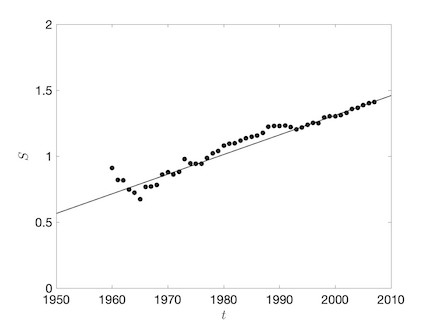

The linear function $S(t) = 0.7\left(1+\frac{t-1959}{47}\right)$ on the same plot describes the trend of the data fairly well. Using this $S(t)$ in our equation for $CO_2$ we now have the following quadratic model for $CO_2$ concentration, $$CO_2=316+0.7\left(1+\frac{t-1959}{47}\right)(t-1959).$$

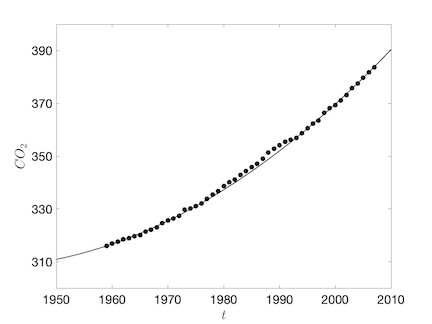

#Model Optimization

##The Least-Squares Error

###Definition

Consider $N$ data points $(X_i,Y_i)$ and a model function $y_M(x)$. The least-squares error is given by
$$E^2 = \frac1N \displaystyle \sum_{i=1}^N \left( Y_i-y_M(X_i)\right)^2.$$

###Example

A simple model for noisy data is given by $(X_i,Y_i)$, 

\begin{equation}
    X_i=i \;\text{and}\; Y_i=(1-(-1)^ir)\;i,
\end{equation}

where $i=1,N$ and $N$ is the number of values $(X_i,Y_i)$. For simplicity, consider even $N$. The parameter $r\geq 0$ represents the percent noise.

Let $N=10$ and $r=0.2$. We want to come up with a model of the form $$y_M=ax+b.$$

The corresponding least-squares error is
\begin{equation} E^2=\frac{1}{10} \displaystyle\sum_{i=1}^{10} \left[(1-(-1)^i\cdot 0.2)\;i-ai-b\right]^2.\end{equation}

We can show analytically that $a=0.93$ and $b=0.27$ minimize the least-squares error, so the optimal linear model is $y_M=0.93x+0.27$ (more later).

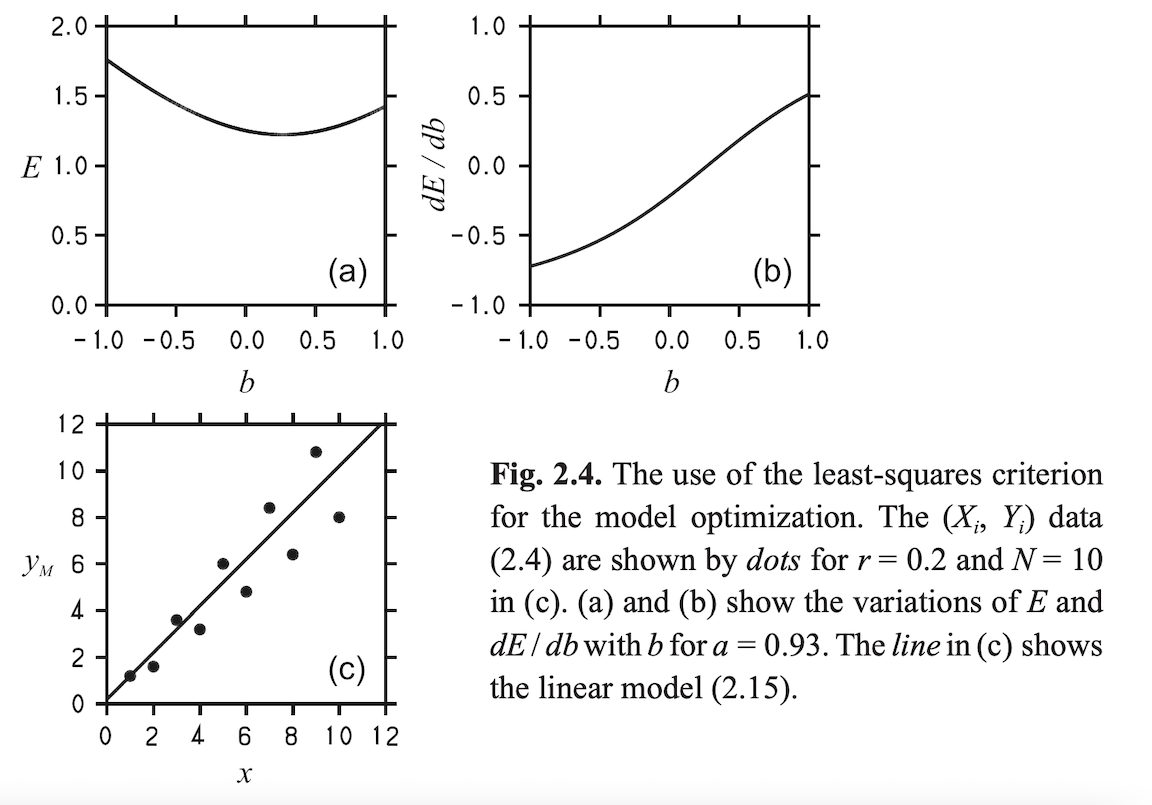

##Mean Values and Fluctuations

###Definition

Consider data values $(X_i,Y_i)$ where $i=1,N$. The **mean values** of the variables $X$ and $Y$ are given by the relations
\begin{equation}
        \langle X \rangle = \frac1N \displaystyle \sum_{i=1}^N X_i, \hspace{20pt} \langle Y \rangle = \frac1N \displaystyle \sum_{i=1}^N Y_i. 
\end{equation}
    
The deviations of $X_i$ and $Y_i$ from their means $\langle X \rangle$ and $\langle Y \rangle$ are called **fluctuations** and are defined by
\begin{equation}
\tilde{X}_i = X_i - \langle X \rangle, \hspace{20pt} \tilde{Y}_i = Y_i - \langle Y \rangle.
\end{equation}

###Exercise

Denote the mean values of fluctuations $\langle \tilde{X} \rangle$ and $\langle \tilde{Y}\rangle$. Show that $\langle \tilde{X} \rangle = \langle \tilde{Y} \rangle = 0.$



##Variances

###Definition

Consider the mean values of quadratic variables, called **second-order moments**,
\begin{equation}
    \langle X^2 \rangle = \frac1N \displaystyle \sum_{i=1}^N X_i X_i, \hspace{10pt} \langle Y^2 \rangle = \frac1N \displaystyle \sum_{i=1}^N Y_i Y_i, \hspace{10pt} \langle XY \rangle = \frac1N \displaystyle \sum_{i=1}^N X_i Y_i.
\end{equation}

The **variances** of $X$ and $Y$ are given by
\begin{eqnarray}
\langle \tilde{X}^2 \rangle &=& \langle X^2 \rangle-\langle X\rangle^2, \\
\langle \tilde{Y}^2 \rangle &=& \langle Y^2 \rangle-\langle Y\rangle^2, \\
\langle \tilde{X}\tilde{Y} \rangle &=& \langle XY\rangle-\langle X\rangle \langle Y\rangle,
\end{eqnarray}

and the **standard deviations** are given by $\langle \tilde{X}^2 \rangle^{1/2}$ and $\langle \tilde{Y}^2 \rangle^{1/2}$.

##Optimal Linear Functions

Determine the parameters $a$ and $b$ of the linear model $y_M=ax+b$ that minimize the least-squares error.
    
\begin{eqnarray*}
        E^2 &=& \frac1N \displaystyle \sum_{i=1}^N \left( Y_i-aX_i-b\right)^2\\
        &=& \cdots \\ &=& \langle\tilde{Y}^2\rangle-2a\langle\tilde{X}\tilde{Y}\rangle + a^2\langle\tilde{X}^2\rangle+\left(b-\langle Y\rangle+a\langle X\rangle\right)^2.
\end{eqnarray*}

Compute partial derivatives.

\begin{eqnarray*}
    \frac{\partial E^2}{\partial a} &=& -2 \langle\tilde{X}\tilde{Y}\rangle + 2a\langle\tilde{X}^2\rangle + 2\langle X\rangle\left( b-\langle Y\rangle +a\langle X\rangle\right),\\
    \frac{\partial E^2}{\partial b} &=& 2\left( b-\langle Y\rangle + a\langle X\rangle\right),
\end{eqnarray*}

Set $\frac{\partial E^2}{\partial a}=0$ and $\frac{\partial E^2}{\partial b}=0$. Then the critical points are given by
$$a=\frac{\langle\tilde{X}\tilde{Y}\rangle}{\langle\tilde{X}^2\rangle}, \;\; b=\langle Y\rangle-a\langle X\rangle.$$

The linear model using these values is $$y_M = ax+b = \langle Y\rangle+\frac{\langle\tilde{X}\tilde{Y}\rangle}{\langle\tilde{X}^2\rangle}(x-\langle X\rangle).$$

Define a variable $D$ by the relation
$$D=\frac{\partial^2 E^2}{\partial a^2} \frac{\partial^2 E^2}{\partial b^2} - \left( \frac{\partial^2 E^2}{\partial a\;\partial b}\right)^2. $$

According to the Second Derivatives Test, $E^2$ has a minimum at the critical points if $\partial^2 E^2/\partial a^2>0$ and $D>0$ at the critical points. 

\begin{equation}
    \frac{\partial^2 E^2}{\partial a^2} = 2\langle\tilde{X}^2\rangle + 2\langle X\rangle^2, \hspace{10pt} \frac{\partial^2 E^2}{\partial b^2} = 2, \hspace{10pt} \frac{\partial^2 E^2}{\partial a\;\partial b} = \frac{\partial^2 E^2}{\partial b\;\partial a}=2\langle X\rangle.
\end{equation}

Hence, $\partial^2 E^2/\partial a^2>0$ and $D=4\langle\tilde{X}^2\rangle>0$, so the optimal linear model is indeed
\begin{equation}
        y_M = \langle Y\rangle+\frac{\langle\tilde{X}\tilde{Y}\rangle}{\langle\tilde{X}^2\rangle}(x-\langle X\rangle).
\end{equation}





#A General Model for Ontogenetic Growth

We will study [A general model for ontogenetic growth](https://www.nature.com/articles/35098076) by West et al. (2001) published in Nature. Models of ontogenetic growth trajectories are often justified on goodness of fit rather than on any biological mechanism. This paper introduces a mathematical model of a wide range of species' growth based on known principles.

##Model Development

* Incoming energy is transformed into metabolic energy used 
to (1) maintain existing tissue and (2) produce new tissue.
* Differences between tissues are ignored and we take some average typical cell.
* Conservation of energy equation, where $E_c$, $B_c$, and the mass of a cell $m_c$ are assumed to be constant:
\begin{equation}
            B = \sum_c \left[ N_c B_c + E_c \frac{dN_c}{dt}\right],
\end{equation}
> $B(t)$: average resting metabolic rate of the whole organism at time $t$, \\
> $B_c$: metabolic rate of a single cell, \\
> $E_c$: metabolic energy required to create a cell, \\
> $N_c$: total number of cells.

* The total body mass is $m = m_c N_c$, so we have
\begin{equation}
            \frac{dm}{dt} = \left( \frac{m_c}{E_c}\right) B - \left(\frac{B_c}{E_c}\right) m.
\end{equation}

* The 3/4-power scaling $B=B_0 m^{3/4}$ has been observed widely in mammals, birds, fish, molluscs, and plants. This would give
\begin{equation}
            \frac{dm}{dt} = am^{3/4} - bm
\end{equation}
with $a=B_0m_c/E_c$ and $b=B_c/E_c$.
* Natural selection tends to optimize energy transport, and this has led to the evolution of fractal-like distribution networks.
* The 3/4 exponent is related to the scaling of $N_t$, the total number of capillaries in the network:
$$B\propto N_t\propto m^{3/4},$$
while the total number of cells $N_c\propto m$. Since the total number of capillaries scales differently from the total number of cells supplied, this limits growth.

* Asymptotic maximum body size ($M$) is reached when $\frac{dm}{dt}=0$ or $M=(a/b)^4 = (B_0m_c/B_c)^4$.
* Then we have $b=a/M^{1/4}$ so the equation can be rewritten as
\begin{equation}
            \frac{dm}{dt} = am^{3/4}\left[1-\left(\frac{m}{M}\right)^{1/4}\right]
\end{equation}
* Integrating this differential equation yields
\begin{equation}
            \left(\frac{m}{M}\right)^{1/4} = 1-\left[1-\left(\frac{m_0}{M}\right)^{1/4}\right] e^{-at/4M^{1/4}}
\end{equation}
where $m_0$ is the mass at birth ($t=0$).



##Model Fits to Data

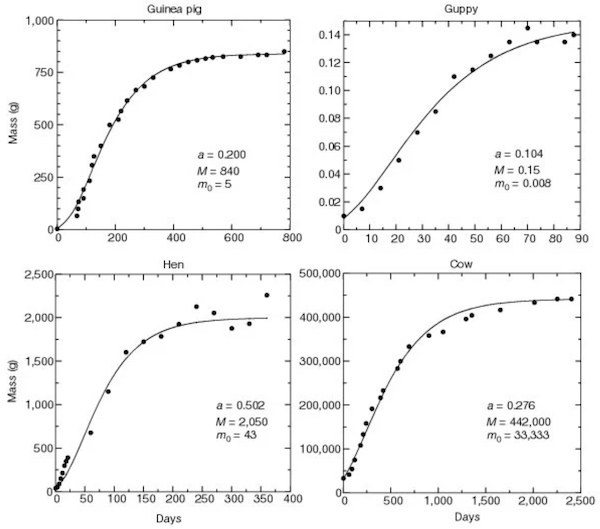

Below we have dimensionless mass ratio $r=(m/M)^{1/4}$ plotted against dimensionless time variable $\tau=at/4M^{1/4}-\ln [1-(m_0/M)^{1/4}]$.
All species, regardless of taxon, cellular metabolic rate, or maximum body size, fall near the same parameterless universal curve $r=1-e^{-\tau}$.

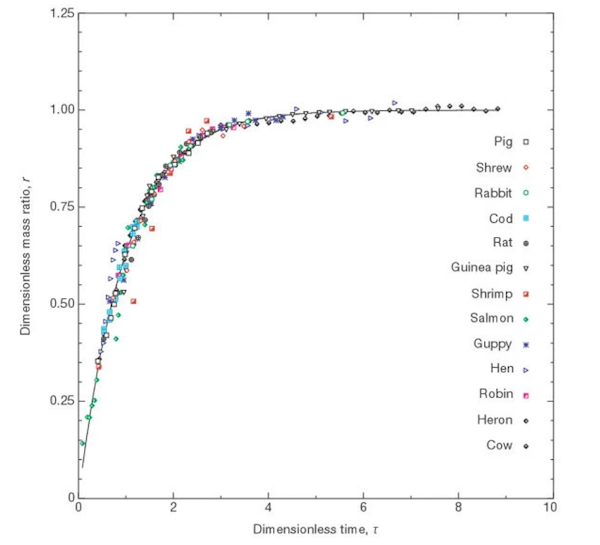